## Use case № 1
This notebook produces Effective Area file in .fits format from original KM3NeT simulation dst.root file

In [1]:
from km3irf import build_aeff
from astropy.io import fits

Define a path to your local `dst.root` file:

In [2]:
data_path = "/run/media/msmirnov/iron_2tb/IRF_data_create/mcv5.1.km3_numuCC.ALL.dst.bdt.root"
# data_path = "/home/msmirnov/working_space/IRF_data_create/mcv5.1.km3_numuCC.ALL.dst.bdt.root"
# data_path = "/home/msmirnov/working_space/some_data/files_cta_km3net/mcv5.1.km3_numuCC.ALL.dst.bdt.root"

Create BuildAeff object:

In [3]:
test_aeff = build_aeff.DataContainer(data_path)

How many events in the file:

In [4]:
test_aeff.df.shape[0]

802872

In [5]:
test_aeff.df.head(4)

,E,dir_x,dir_y,dir_z,E_mc,dir_x_mc,dir_y_mc,dir_z_mc,weight_w2,bdt0,bdt1
0,349.621209,-0.670299,0.270036,0.691216,268.990,-0.670996,0.286741,0.683772,4.510000e+11,12.0,-2.000000
1,20.423436,0.327411,0.078130,-0.941646,178.710,0.327387,0.079789,-0.941515,1.182000e+11,1.0,-2.000000
2,184.966630,0.794867,0.354793,-0.492248,214.610,0.799260,0.353143,-0.486285,1.960000e+11,1.0,-2.000000
3,52.327015,0.455668,-0.632999,0.625843,291.347,0.432161,-0.625802,0.649314,5.622000e+11,11.0,0.998906


Apply user defined cuts:

In [6]:
test_aeff.apply_cuts()
test_aeff.df.shape[0]

331325

Apply re-weighting procedure

In [7]:
weighted_dict = test_aeff.weight_calc(tag="nu", df_pass=test_aeff.df)
weighted_dict.values()


dict_values([array([8.43265542e+00, 7.72364843e+00, 7.77098987e+00, ...,
       1.99530627e-05, 2.18194734e-05, 1.78086831e-05])])

Build .fits for effective area, it needs to specify the input pandas data frame.

In [8]:
test_aeff.build_aeff(df_pass=test_aeff.df)

file aeff.fits is written successfully!


Check the output file with `gammapy`

In [9]:
#install gammapy if it needs
#!pip install gammapy
from gammapy.irf import EffectiveAreaTable2D

In [10]:
# Read effective area IRFs
aeff = EffectiveAreaTable2D.read("aeff.fits", hdu='EFFECTIVE AREA')
print(aeff)

EffectiveAreaTable2D
--------------------

  axes  : ['energy_true', 'offset']
  shape : (48, 12)
  ndim  : 2
  unit  : m2
  dtype : >f8



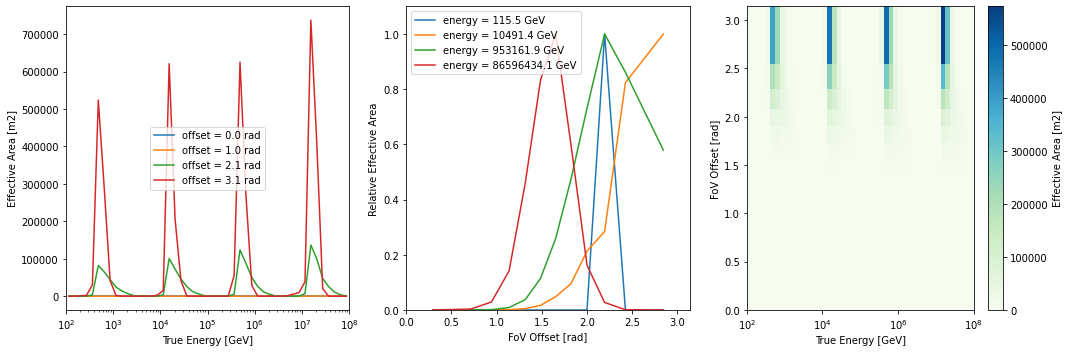

In [11]:
aeff.peek()